In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress


In [2]:
# Read the merged CSV file
df = pd.read_csv('merged.csv')

In [3]:
hurricanes = df['Hurricanes']
desert_temps = df['Avg Desert Max Temp']
ocean_temps = df['Avg Ocean Max Temp']

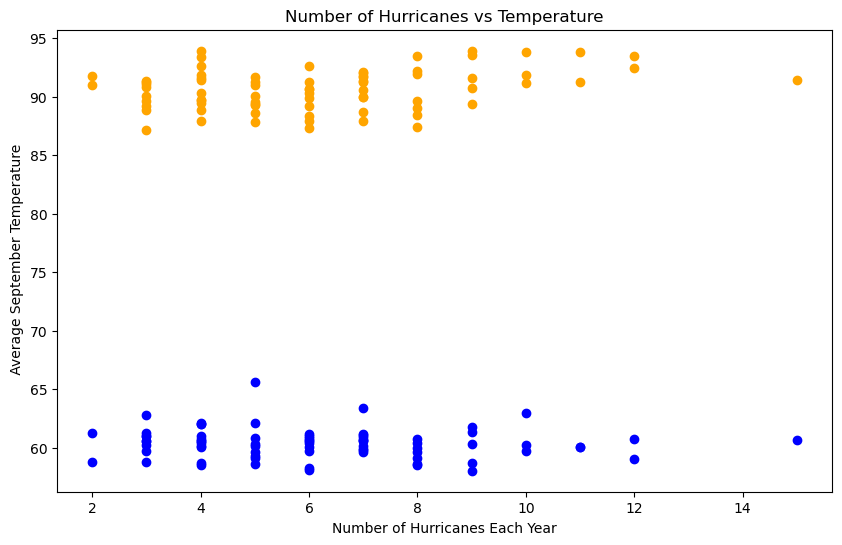

In [4]:
plt.figure(figsize=(10, 6))
plt.scatter(hurricanes, desert_temps, color='orange', label='Desert Temperatures')
plt.scatter(hurricanes, ocean_temps, color='blue', label='Ocean Temperatures')

# Set labels and title
plt.xlabel('Number of Hurricanes Each Year')
plt.ylabel(' Average September Temperature')
plt.title('Number of Hurricanes vs Temperature')
hovertemplate: 'Year'

# Show the plot
plt.show()

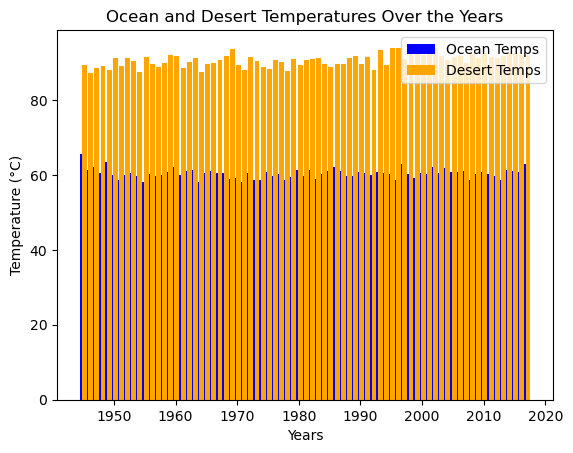

In [5]:
plt.bar(df['Year'] - .2, df['Avg Ocean Max Temp'], width=0.8, color='blue', label='Ocean Temps')
plt.bar(df['Year'] + .2, df['Avg Desert Max Temp'], width=0.8, color='orange', label='Desert Temps')

# Adding labels and title
plt.xlabel('Years')
plt.ylabel('Temperature (°C)')
plt.title('Ocean and Desert Temperatures Over the Years')

# Adding legend
plt.legend()

# Display the plot
plt.show()

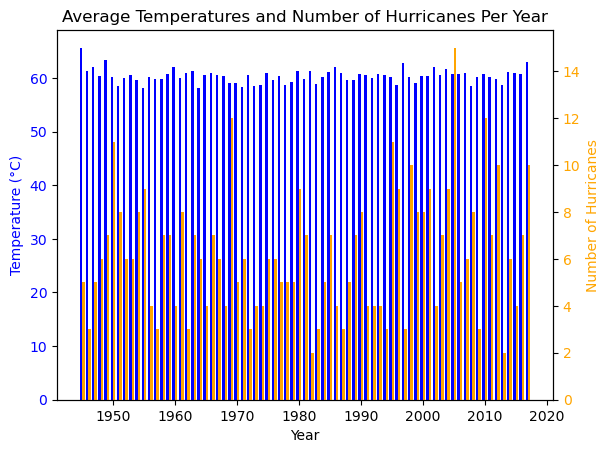

In [6]:
# Plotting the bar chart
fig, ax1 = plt.subplots()

# Bar for Average Temperatures
ax1.bar(df['Year'] - 0.2, df['Avg Ocean Max Temp'], width=0.4, color='blue', label='Average Temperature')
ax1.set_xlabel('Year')
ax1.set_ylabel('Temperature (°C)', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a second y-axis for the number of hurricanes
ax2 = ax1.twinx()
ax2.bar(df['Year'] + 0.2, df['Hurricanes'], width=0.4, color='orange', label='Number of Hurricanes')
ax2.set_ylabel('Number of Hurricanes', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')

# Adding title
plt.title('Average Temperatures and Number of Hurricanes Per Year')

# Display the plot
plt.show()

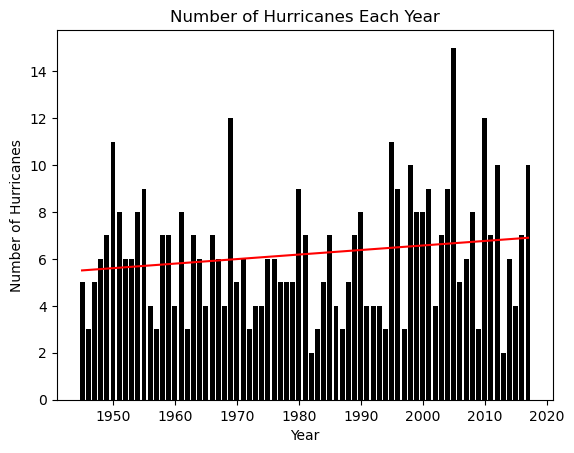

In [7]:
df = pd.read_csv('merged.csv')

# Plotting the bar chart for the number of hurricanes
plt.bar(df['Year'], df['Hurricanes'], color='black')
plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Hurricanes Each Year')

# Calculate the trend line using linear regression
slope, intercept, r_value, p_value, std_err = linregress(df['Year'], df['Hurricanes'])
trend_line = slope * df['Year'] + intercept

# Plot the trend line
plt.plot(df['Year'], trend_line, color='red', label='Trend Line')


# Display the plot
plt.show()

In [8]:
summary = df.describe()
print(summary)

              Year  Named Storms  Hurricanes  MajorHurricanes  \
count    73.000000     73.000000   73.000000        73.000000   
mean   1981.000000     11.205479    6.205479         2.712329   
std      21.217131      4.143130    2.640280         1.889146   
min    1945.000000      4.000000    2.000000         0.000000   
25%    1963.000000      8.000000    4.000000         1.000000   
50%    1981.000000     11.000000    6.000000         2.000000   
75%    1999.000000     13.000000    8.000000         4.000000   
max    2017.000000     28.000000   15.000000         8.000000   

       Avg Ocean Max Temp  Avg Ocean Min Temp   Ocean Wind Speed  \
count           73.000000            73.000000         73.000000   
mean            60.391872            54.526256         12.346712   
std              1.291516             1.456989          1.422659   
min             58.043333            48.750000          9.766667   
25%             59.716667            53.826667         11.576667   
50%   

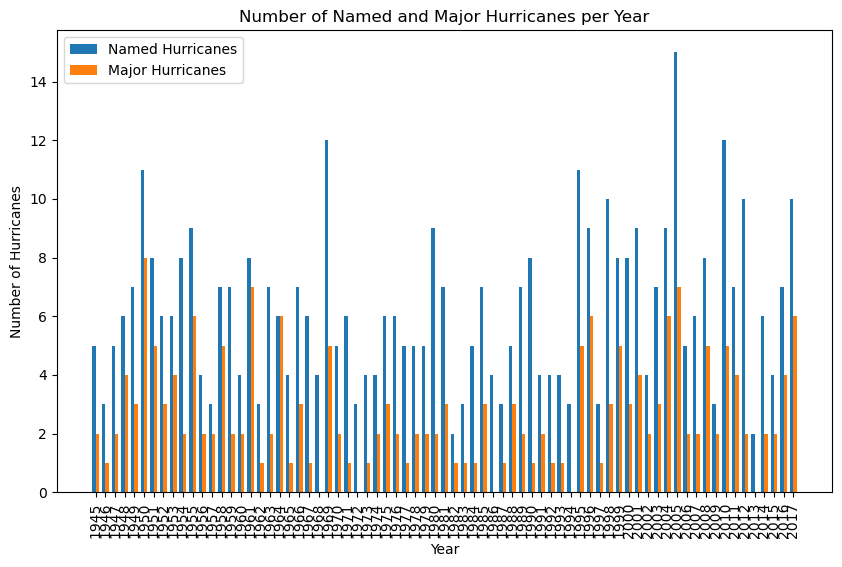

In [15]:
# Group the data by year and sum the counts for named and major hurricanes
grouped_data = df.groupby('Year').agg({'Hurricanes': 'sum', 'MajorHurricanes': 'sum'}).reset_index()

# Plotting the double bar chart
plt.figure(figsize=(10, 6))

bar_width = 0.35
bar_positions1 = range(len(grouped_data))
bar_positions2 = [pos + bar_width for pos in bar_positions1]

plt.bar(bar_positions1, grouped_data['Hurricanes'], width=bar_width, label='Named Hurricanes')
plt.bar(bar_positions2, grouped_data['MajorHurricanes'], width=bar_width, label='Major Hurricanes')

plt.xlabel('Year')
plt.ylabel('Number of Hurricanes')
plt.title('Number of Named and Major Hurricanes per Year')
plt.xticks([pos + bar_width / 2 for pos in bar_positions1], grouped_data['Year'], rotation='vertical')
plt.legend()

plt.show()

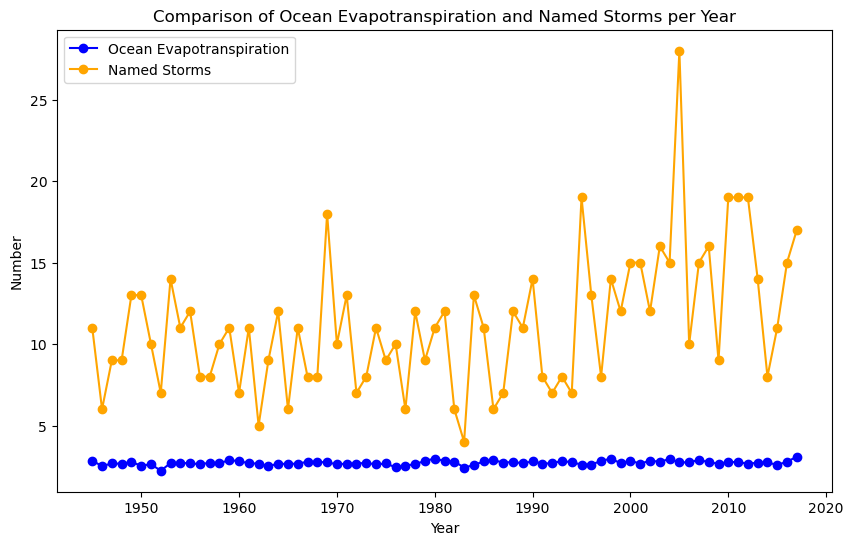

In [19]:
grouped_data = df.groupby('Year').agg({'Ocean Evapotrasnpiration': 'sum', 'Named Storms': 'sum'}).reset_index()

# Plotting the line chart
plt.figure(figsize=(10, 6))

# Plot Ocean Evapotranspiration as a blue line
plt.plot(grouped_data['Year'], grouped_data['Ocean Evapotrasnpiration'], label='Ocean Evapotranspiration', color='blue', marker='o', linestyle='-')

# Plot Named Hurricanes as an orange line
plt.plot(grouped_data['Year'], grouped_data['Named Storms'], label='Named Storms', color='orange', marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Number')
plt.title('Comparison of Ocean Evapotranspiration and Named Storms per Year')
plt.legend()

plt.show()

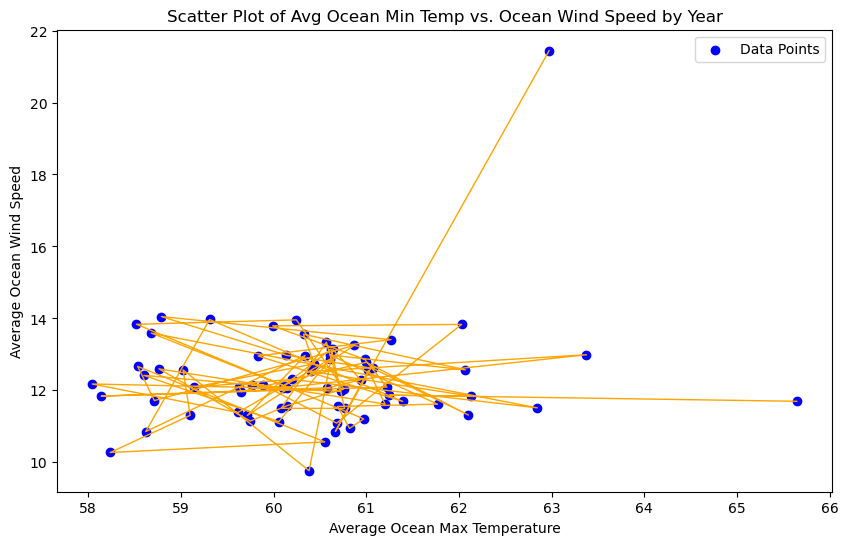

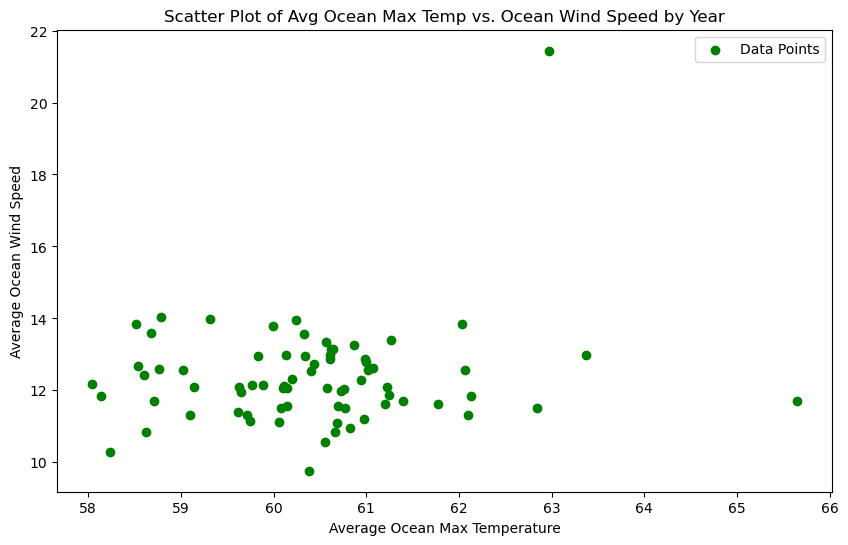

In [24]:
grouped_data = df.groupby('Year').agg({'Avg Ocean Max Temp': 'mean', 'Ocean Wind Speed': 'mean'}).reset_index()

# Plotting the scatter plot
plt.figure(figsize=(10, 6))

plt.scatter(grouped_data['Avg Ocean Max Temp'], grouped_data['Ocean Wind Speed'], label='Data Points', color='green', marker='o')

plt.xlabel('Average Ocean Max Temperature')
plt.ylabel('Average Ocean Wind Speed')
plt.title('Scatter Plot of Avg Ocean Max Temp vs. Ocean Wind Speed by Year')
plt.legend()

plt.show()